In [8]:
%reload_ext autotime
import pandas as pd
import requests
from pprint import pprint
import json
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
from tqdm.auto import tqdm

pd.options.plotting.backend = "plotly"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

In [9]:
df = pd.read_excel("givealittle_health.xlsx")
df.index = pd.to_datetime(df["start"])
df["text"] = df.title.str.cat(df[["pitch", "description", "use_of_funds", "updates"]].astype(str), sep=" ")
df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A,text
start,,,,,,,,,,,,,,,,,,,,,,
2025-06-09,"Rugby league lover, Ben Stowers, has had his whole life turned upside down from one tackle.","This page has been started to help Ben, his partner and their families with the financial impact...",https://static.givealittle.co.nz/assets/hero/82a33c79-46e8-4c6c-ad1a-b2f7010ebbc2-320:False,https://givealittle.co.nz/cause/rugby-league-lover-ben-stowers-has-had-his-whole,3070.0,0.0,362 days to go,Donate,https://givealittle.co.nz/donate/cause/rugby-league-lover-ben-stowers-has-had-his-whole,9 Jun 2025,8 Jun 2026,0,"Porirua, Wellington",52.0,"On the 22nd of March Ben's life took a turn for the worse, playing the sport he loved - Rugby Le...","Travel between Wellington and Christchurch, day to day living expenses, modifications to home",Created by\r\nKarra Hanara \n\n\n\n\r\n Paying to a verified bank account of\r\nPeta Manav...,Page Moderated,NaN,NaN,NaN,"Rugby league lover, Ben Stowers, has had his whole life turned upside down from one tackle. This..."
2025-06-09,HOPE FOR SUMMER #BATTENSBEATER,An ultra rare Princess who is fighting a rare disease Batten Disease CLN1 only one ever in NZ he...,https://static.givealittle.co.nz/assets/hero/62b8152b-4f56-4c62-b602-b2f701558791-320:False,https://givealittle.co.nz/cause/hope-for-summer-battensbeater,585.0,0.0,727 days to go,Donate,https://givealittle.co.nz/donate/cause/hope-for-summer-battensbeater,9 Jun 2025,9 Jun 2027,0,Nationwide,14.0,Summer is 11 years old with a rare terminal Disease called Batten Disease CLN1 there is no cure ...,Medical costs medical equipment costs making memeories and other expenses for helping Summer to ...,"Created by, and paying to a verified bank account of,\r\nRay Mudford on behalf of Summer M...",Page Moderated,1.0,A little something about Summer 🦄\n11 June 2025\nYou will never see Summer without a reborn she ...,NaN,HOPE FOR SUMMER #BATTENSBEATER An ultra rare Princess who is fighting a rare disease Batten Dise...
2025-06-08,Help Esther Fight Breast Cancer — A Young Mum from Vanuatu,Please help a Vanuatu family through a hard time!,https://static.givealittle.co.nz/assets/hero/be4d939b-2ea7-4b03-b2d0-b2f60130466f-320:False,https://givealittle.co.nz/cause/help-esther-fight-breast-cancer-a-young-mum,760.0,2100.0,11 days to go,Donate,https://givealittle.co.nz/donate/cause/help-esther-fight-breast-cancer-a-young-mum,8 Jun 2025,22 Jun 2025,0,"Cromwell, Otago",16.0,"This fundraiser is for Esther, a strong and loving 31-year-old mother from Vanuatu, who is coura...",To Esther treatment in india,"Created by, and paying to a verified bank account of,\r\nMagali Domingo on behalf of Esther...",Page Moderated,1.0,"Update on Esther – Thank You for Your Support\n10 June 2025\nGood morning everyone,\nI want to s...",NaN,Help Esther Fight Breast Cancer — A Young Mum from Vanuatu Please help a Vanuatu family through ...
2025-06-08,$100k in 100 days!,Help save a life saving service for mothers in South Auckland & North Waikato,https://static.givealittle.co.nz/assets/hero/e70859ac-626e-4150-9be2-b2f9011aee93-320:False,https://givealittle.co.nz/cause/savewellwomen,4779.0,100000.0,110 days to go,Donate,https://givealittle.co.nz/donate/cause/savewellwomen,8 Jun 2025,30 Sep 2025,0,Auckland,63.0,"At Well Women Trust, we walk alongside women through some of the most vulnerable times in their ...","Well Women Trust needs to raise $100,000 within 100 days to keep services running.We are calling...","Created by, and paying to a verified bank account of,\r\n \r\n Well Women\r\n ...",Page Moderated,NaN,NaN,NaN,$100k in 100 days! Help save a life saving service for mothers in South Auckland & North Waikato...
2025-06-08,Goldenhar Syndrome: Help a Young Girl Through Her Medical Hurdles,"My daughter was born with Goldenhar syndrome, a rare congenital disorder. After years 

In [3]:
# Loading this model needs about 22.69GB of GPU memory
model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Input:
https://givealittle.co.nz/cause/young-mother-of-3-recently-diagnosed
Young mother of 3 recently diagnosed with aggressive breast cancer Young mother of three fighting aggresive breast cancer. Imagine facing one of life's biggest battles while also caring for a young family.
Our beloved Amy was recently diagnosed with aggressive breast cancer in both breasts, she is 32 years old a wife and mother of three. She is showing incredible strength and courage. Between treatments, doctors visits, and trying to stay positive for her children, she is fighting hard.
Some of you may already know about the ongoing struggles with there youngest sons health who has also recently been diagnosed with the life long condition of bronchiectasis. And on top of all of this there only form of transport is needing a new motor.
There family would appreciate any help with any donations to help with the financial burden they are facing.
If you can give a little, anything you can spare, it would go a long w

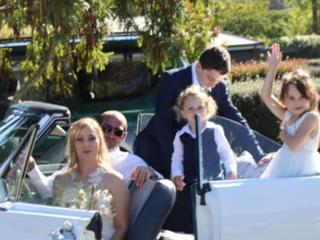

Output:
{'ICD': 'C50',
 'ICD10': 'C50.0',
 'age': 32,
 'age_group': '15-64',
 'attractiveness': 50,
 'condition': 'aggressive breast cancer',
 'deservingness': 100,
 'ethnicity': 'caucasian',
 'gender': 'female',
 'name': 'Amy',
 'notes': '',
 'sentiment': 80,
 'smiling': False,
 'truth': 80,
 'urgency': 80,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/finlee-bremners-road-to-recovery
Finlee Bremners Road to recovery Helping our great friends navigate Finlee's long journey with kidney disease. On the 2nd October 2024, Kayla, Michael and Arlo welcomed a beautiful baby girl into the world, Finlee Anne Bremner.
Within a short 3 weeks, wee Finlee and her family were back in Dunedin due to some swelling in her face. 5 days later, Kayla and Finlee were flown to Starship hospital where they underwent further testing in which Finlee was diagnosed with Congenital Neprotic Syndrome which effects the function of her kidneys.
Since Thursday 23th October and just 18 days old

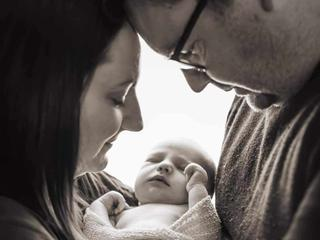

Output:
{'ICD': 'Nephrotic Syndrome',
 'ICD10': 'N06.9',
 'age': '18 days',
 'age_group': '0-14',
 'attractiveness': 100,
 'condition': 'Congenital Nephrotic Syndrome',
 'deservingness': 100,
 'ethnicity': 'Caucasian',
 'gender': 'Female',
 'name': 'Finlee Anne Bremner',
 'notes': 'No warnings or errors were encountered.',
 'sentiment': 100,
 'smiling': False,
 'truth': 100,
 'urgency': 100,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/paulas-stage-4-brain-cancer-fight-please-help
Paula Matafahi's Grade 4 Brain Cancer Fight - We need your help This page has been set up to help Paula access unfunded drugs to offer hope and relieve his symptoms. Paula is an extraordinary 18 year old young man whose spirit shines brightly even in adversity.
Recently diagnosed with Grade 4 Glioblastoma Multiforme brain cancer, Paula’s journey has taken a challenging turn, yet he remains a beacon of strength and hope for family and friends. He comes from a loving family, blessed with

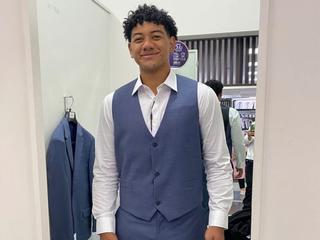

Output:
{'ICD': 'C75',
 'ICD10': 'C75.1',
 'age': '18',
 'age_group': '15-64',
 'attractiveness': 80,
 'condition': 'Grade 4 Glioblastoma Multiforme brain cancer',
 'deservingness': 100,
 'ethnicity': 'Pacific Islander',
 'gender': 'male',
 'name': 'Paula Matafahi',
 'notes': 'The image of the person in the photo is not clear, but based on the '
          'context of the campaign, it is likely that the person is of Pacific '
          'Islander ethnicity.',
 'sentiment': 95,
 'smiling': True,
 'truth': 90,
 'urgency': 90,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/our-sweet-boy-jairo
Our Sweet boy Jairo Please help Jairo get the testing and screening that he needs My 8 week old baby Jairo has had chronic collic and constipation since he was born. I believe he has an allergy or gut issue, as he always sounds congested, his eyes swell up after a bottle and he breaks out in rash on his face. I have gone through the public health system but after a brief physical 

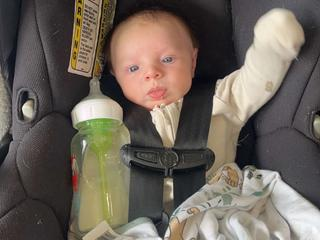

Output:
{'ICD': 'R',
 'ICD10': 'R063',
 'age': '8 weeks',
 'age_group': '0-14',
 'attractiveness': 80,
 'condition': 'colic',
 'deservingness': 100,
 'ethnicity': 'European',
 'gender': 'male',
 'name': 'Jairo',
 'notes': 'The campaign is for a private clinic appointment and testing, with '
          'a goal of $600.',
 'sentiment': 80,
 'smiling': False,
 'truth': 90,
 'urgency': 90,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/ems-ms-journey
Em’s MS Journey Stemcell replacement for Em’s MS Journey. Clínica Ruiz In Mexico. My daughter is 25 and has recently been diagnosed with Multiple Sclerosis. Em was working fulltime up until she suddenly started losing feeling in her hands and feet.
After being admitting into hospital she lost all feeling from her bellybutton down. MRIs showed multiple lesions in her brain and down her spine. Emma spent time at a rehabilitation clinic trying to get her ability to walk back and deal with this life changing news.
Unfortunatel

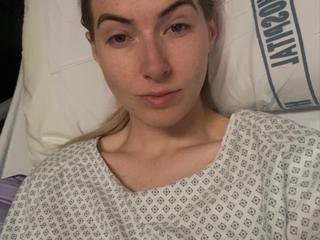

Output:
{'ICD': 'G',
 'ICD10': 'G35',
 'age': '25',
 'age_group': '15-64',
 'attractiveness': '80',
 'condition': 'Multiple Sclerosis',
 'deservingness': '100',
 'ethnicity': 'white',
 'gender': 'female',
 'name': 'Emma',
 'notes': 'The text is clear and well-written. The use of medical terminology '
          'is accurate. There are no errors or inconsistencies in the text.',
 'sentiment': '60',
 'smiling': 'false',
 'truth': '80',
 'urgency': '80',
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/support-my-mums-battle-against-breast-cancer
Support My Mum's Battle Against Breast Cancer Rebeccas battle with breast cancer This past year has been incredibly challenging for my mum, who was diagnosed with aggressive breast cancer. After enduring six months of chemotherapy and two operations, she continues to fight with remarkable courage. However, her journey is far from over, as she faces another six months of chemotherapy and radiation, along with vital immune therap

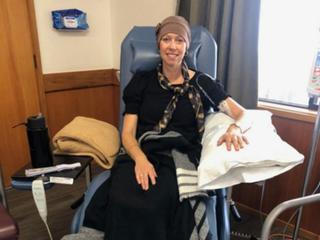

Output:
{'ICD': 'C',
 'ICD10': 'C50',
 'age': 'not specified',
 'age_group': 'not specified',
 'attractiveness': 70,
 'condition': 'breast cancer',
 'deservingness': 100,
 'ethnicity': 'white',
 'gender': 'female',
 'name': 'Rebecca',
 'notes': 'The image is blurry, making it difficult to determine the '
          'ethnicity. However, based on the image, the person appears to be '
          'white.',
 'sentiment': 90,
 'smiling': True,
 'truth': 90,
 'urgency': 80,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/every-little-bit-counts-1
Every little bit counts! Helping to fund Mrs Jacobs's cancer treatment. Hi there,
I am Sandy Jacobs, a school principal, and I love my job.
As most of my community is already aware, I am undertaking 18 weeks of chemotherapy to fight early-stage breast cancer. Most of the drugs are, fortunately, funded by the government or my medical insurance. That is all except one, Pertuzumab. Pertuzumab has been shown to increase my chances of b

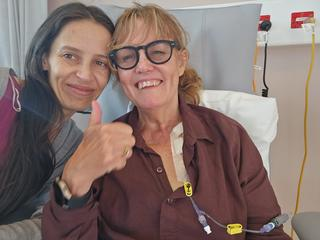

Output:
{'ICD': 'C00-D49',
 'ICD10': 'C50',
 'age': 'adult',
 'age_group': '15-64',
 'attractiveness': 70,
 'condition': 'breast cancer',
 'deservingness': 90,
 'ethnicity': 'white',
 'gender': 'female',
 'name': 'Sandy Jacobs',
 'notes': '',
 'sentiment': 90,
 'smiling': True,
 'truth': 90,
 'urgency': 80,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/jusson-henrys-whanau-need-your-help
Jusson Henry's Whanau Need Your Help Please help Jusson's parents stay by his side. Every bit helps Jusson is a hard working, valuable team member of Ngapae Holiday Park. Jusson is a humble lad who will do anything for anybody and is widely respected. He is a wonderful ambassador for the Far North and is a favourite of our guests at our Holiday Park.
Through not fault of his own, Jusson has incurred serious head injuries and is now a patient of the Auckland Brain Trauma Unit.
His mum and dad, Rose and Mike have kept a vigial by Jusson’s side with Mike regularly commuting between 

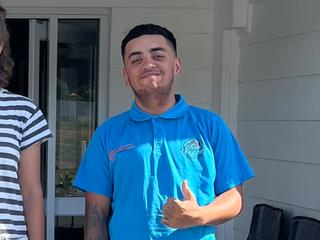

Output:
{'ICD': 'S',
 'ICD10': 'S06',
 'age': 'adult',
 'age_group': '15-64',
 'attractiveness': 70,
 'condition': 'head injuries',
 'deservingness': 90,
 'ethnicity': 'Maori',
 'gender': 'male',
 'name': 'Jusson Henry',
 'notes': 'No errors or warnings',
 'sentiment': 80,
 'smiling': True,
 'truth': 80,
 'urgency': 80,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/crickey-how-much-can-one-whanau-take
CRICKEY! How much can one whanau take?!?! Help support Erin Thomson's family with urgent relocation costs for critical medical treatment. The Thomson family, a beautiful young family of five, has been hit with wave after wave of medical challenges that no one could ever anticipate. Many of you may be aware that Erin has endured a series of life-threatening medical crises, and now the latest of which requires urgent treatment in Melbourne. Through all of this, Erin and her husband John have remained private and humble, never asking for help. But now, this is a way we

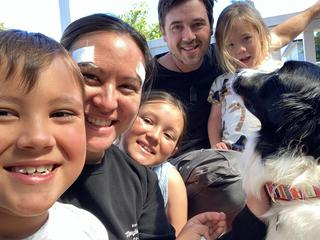

Output:
{'ICD': 'Not provided',
 'ICD10': 'Not provided',
 'age': 'Not provided',
 'age_group': 'Not provided',
 'attractiveness': 'Not provided',
 'condition': 'Life-threatening medical crises',
 'deservingness': '100',
 'ethnicity': 'Pacific Islander',
 'gender': 'Female',
 'name': 'Erin Thomson',
 'notes': 'The image is not clear, but based on the name Erin and the mention '
          'of New Zealand, it is likely that Erin is of Pacific Islander '
          'ethnicity.',
 'sentiment': '100',
 'smiling': 'true',
 'truth': '100',
 'urgency': '100',
 'use': 'Medical expenses'}


Input:
https://givealittle.co.nz/cause/support-steph-brave-mum-brain-cancer-fighter
Support Steph: Brave Mum, Breast Cancer Survivor, Fierce Brain Cancer Fighter Please support Steph, brave mum battling Stage 4 Glioblastoma, help her buy time and make precious memories with her girls! If you know Steph, you know, she's charismatic, she lights up a room, positive, fun, with a wicked sense of humour, above all a

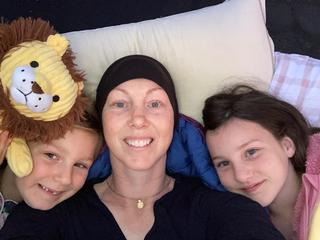

Output:
{'ICD': 'C',
 'ICD10': 'C72.0',
 'age': 'Not specified',
 'age_group': 'Not specified',
 'attractiveness': 80,
 'condition': 'Stage 4 Glioblastoma',
 'deservingness': 100,
 'ethnicity': 'Caucasian',
 'gender': 'Female',
 'name': 'Steph',
 'notes': 'Image suggests Caucasian ethnicity',
 'sentiment': 100,
 'smiling': True,
 'truth': 90,
 'urgency': 90,
 'use': 'Medical expenses'}




In [7]:
for row in tqdm(df.head(10).itertuples(index=False)):
    print("Input:")
    print(row.uri)
    print(row.text)
    image = Image.open(requests.get(row.hero, stream=True).raw)
    display(image)
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": """
                    The below message is text extracted from givealittle, a crowdfunding platform. It's a health related campaign.
                    I've also included the hero image for the campaign.
                    For the text below, extract the following information, in JSON format:
                    condition: the primary health condition mentioned in the text
                    ICD10: the ICD10 code for the primary health condition
                    ICD: the top level ICD chapter for the primary health condition
                    name: the name of the person this campaign is for
                    gender: the gender of the person this campaign is for
                    age: the age of the person this campaign is for
                    age_group: the age group of the person this campaign is for, one of 0-14, 15-64, 65+
                    ethnicity: the ethnicity of the person this campaign is for. If not mentioned in the text, guess their ethnicity from the image.
                    urgency: a number from 0-100, indicating how urgent the need is
                    sentiment: a number from 0-100, indicating the sentiment of the text, where 100 is the most positive, and 0 is the most negative
                    truth: a number from 0-100, indicating how truthful the text is, where 100 is the most truthful, and 0 is the least truthful
                    notes: any additional information about how you processed this text, such as warnings or errors
                    smiling: a boolean indicating whether the person in the image is smiling
                    deservingness: a number from 0-100, indicating how deserving the person is of receiving funds, where 100 is the most deserving, and 0 is the least deserving
                    attractiveness: a number from 0-100, indicating how attractive the person is, where 100 is the most attractive, and 0 is the least attractive
                    use: The primary use of the raised funds - one of: medical expenses, experimental therapies, travel expenses, lost wages

                    Do not include comments in your JSON response. Only respond with the JSON object. Make sure the JSON is valid.
                """},
                {"type": "image"},
                {"type": "text", "text": row.text}
            ]
        }
    ]
    input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(
        image,
        input_text,
        add_special_tokens=False,
        return_tensors="pt"
    ).to(model.device)

    for retry in range(3):
        output = model.generate(**inputs, max_new_tokens=5000)
        result = processor.decode(output[0])
        result = result[result.rindex("<|end_header_id|>") + len("<|end_header_id|>"):].strip().replace("<|eot_id|>", "")
        print("Output:")
        try:
            result = json.loads(result)
            pprint(result)
            print("\n")
            break
        except json.JSONDecodeError:
            print(f"Unable to parse: {result}")